In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('chifoumy/data/chifoumi-dataset.csv')
df.head()

,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,...,17y,18x,18y,19x,19y,20x,20y,21x,21y,target
0,0.972548,0.503541,0.888238,0.670902,0.766331,0.698617,0.688033,0.595593,0.653848,0.487888,...,0.439262,0.785297,0.249039,0.682782,0.291712,0.707206,0.337388,0.752084,0.343444,2
1,0.883314,0.585556,0.758897,0.738274,0.619175,0.731899,0.540562,0.609661,0.514005,0.497798,...,0.516720,0.639559,0.312580,0.554995,0.351059,0.577250,0.405897,0.619907,0.421913,2
2,0.910765,0.598994,0.836391,0.407034,0.722001,0.359720,0.642534,0.440818,0.602230,0.552093,...,0.562702,0.660576,0.772937,0.619692,0.700938,0.657051,0.666762,0.697424,0.658073,2
3,0.942804,0.452263,0.843116,0.593405,0.718336,0.579437,0.654337,0.451111,0.632054,0.341280,...,0.299582,0.769897,0.152735,0.655527,0.150431,0.675466,0.203113,0.716827,0.225120,2
4,0.916129,0.525466,0.825934,0.410975,0.722051,0.406688,0.660051,0.489497,0.622740,0.590304,...,0.635309,0.720663,0.833326,0.715275,0.790811,0.755227,0.748631,0.783695,0.725269,2


In [3]:
df.shape

(2049, 43)

In [4]:
df.describe()

,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,...,17y,18x,18y,19x,19y,20x,20y,21x,21y,target
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,...,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,0.882017,0.492025,0.798510,0.608148,0.674112,0.643569,0.567116,0.621330,0.502557,0.593399,...,0.456958,0.627949,0.365591,0.540699,0.381507,0.533654,0.398570,0.537180,0.401143,1.004880
std,0.091499,0.125221,0.094683,0.146058,0.101158,0.192730,0.111130,0.197508,0.120820,0.203834,...,0.126941,0.109267,0.236114,0.100592,0.211332,0.120850,0.197042,0.157319,0.195244,0.811884
min,0.467607,-0.147117,0.458707,-0.070512,0.304918,0.010352,0.157513,0.013287,0.054466,-0.090281,...,0.087641,0.177650,-0.035256,0.082736,-0.033415,0.059194,-0.028786,-0.020457,-0.061911,0.000000
25%,0.828709,0.415357,0.744916,0.525867,0.614309,0.563649,0.497591,0.504024,0.418720,0.445361,...,0.371936,0.561184,0.215488,0.474720,0.246018,0.441776,0.271980,0.395130,0.273821,0.000000
50%,0.889993,0.489420,0.800820,0.634368,0.675113,0.700494,0.568609,0.650704,0.500678,0.608632,...,0.439415,0.632708,0.280064,0.534814,0.308624,0.532049,0.338879,0.558578,0.345064,1.000000
75%,0.943832,0.565252,0.858041,0.707623,0.734638,0.777069,0.633459,0.768354,0.583108,0.755680,...,0.529573,0.695902,0.408150,0.601305,0.420603,0.617025,0.458617,0.654663,0.470131,2.000000
max,1.140496,1.065905,1.050855,0.957176,0.976205,1.023172,0.952377,1.035136,0.951332,1.121013,...,0.957561,0.968650,1.063550,0.884594,1.078582,0.926034,1.140382,0.958110,1.192943,2.000000


In [5]:
data = df.copy()

In [6]:
X = data.drop(columns = 'target')
y = data['target']

In [7]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [9]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
base_log = cross_validate(model_log, X_train, y_train, cv = 5, scoring = 'accuracy')
base_log

{'fit_time': array([0.0153873 , 0.01222301, 0.01105404, 0.01032209, 0.01338482]),
 'score_time': array([0.00017667, 0.00019908, 0.00018001, 0.00015497, 0.00014019]),
 'test_score': array([1.        , 0.99348534, 1.        , 0.99674267, 1.        ])}

In [10]:
base_log['test_score'].mean()

0.9980456026058633

In [11]:
%%time
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy import stats

# Instanciate model
model = model_log

# Hyperparameter search space
search_space = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C' : [1.0, 0.1, 0.01, 0.001],
    'penalty' : ['none', 'l2', 'l1', 'elasticnet']
}

# Instanciate Random Search
rsearch = GridSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=5, verbose=0)


rsearch.fit(X_scaled,y)

/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

CPU times: user 370 ms, sys: 116 ms, total: 486 ms
Wall time: 3.06 s


/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 0.1, 0.01, 0.001],
                         'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [12]:
rsearch.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}

/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

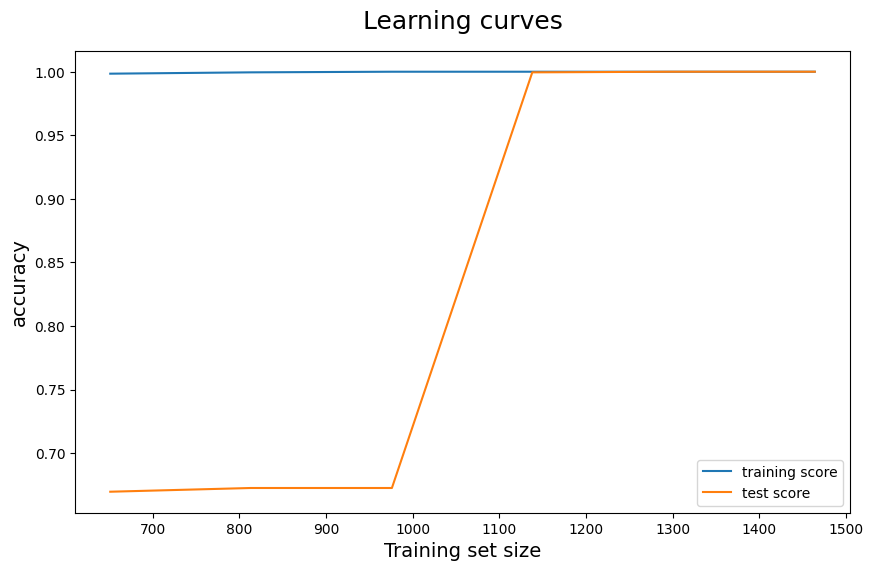

In [13]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# create the training size slices
train_sizes = np.linspace(1,1464, num = 10, dtype='int')

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(\
                                                        estimator = LogisticRegression(solver = 'saga',\
                                                                                        C = 1.0,
                                                                                        penalty = 'l1'),
                                                        X = X_scaled, 
                                                        y = y,
                                                        scoring = 'accuracy',
                                                        train_sizes = train_sizes, 
                                                        cv = 5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [14]:
%%time
model_log = LogisticRegression(solver = 'saga',\
                               C = 1.0,
                               penalty = 'l1').fit(X_train, y_train)
y_pred = model_log.predict(X_test)

CPU times: user 324 ms, sys: 2.41 ms, total: 327 ms
Wall time: 109 ms


/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
results_df = pd.DataFrame({"actual": y_test,
                           "predicted": y_pred}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])
confusion_matrix

predicted,0,1,2
actual,,,
0,177,0,0
1,0,167,0
2,0,0,169


In [16]:
score = cross_validate(model_log, X_train, y_train, scoring='accuracy')

/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davidr/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

In [17]:
score['test_score'].mean()

0.9986970684039088